In [1]:
pip install numpy sklearn scipy pandas matplotlib --upgrade

Requirement already up-to-date: numpy in /home/gabriel/anaconda3/lib/python3.7/site-packages (1.21.5)
Requirement already up-to-date: sklearn in /home/gabriel/anaconda3/lib/python3.7/site-packages (0.0)
Requirement already up-to-date: scipy in /home/gabriel/anaconda3/lib/python3.7/site-packages (1.7.3)
Requirement already up-to-date: pandas in /home/gabriel/anaconda3/lib/python3.7/site-packages (1.3.5)
Requirement already up-to-date: matplotlib in /home/gabriel/anaconda3/lib/python3.7/site-packages (3.5.1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
scipy: 1.7.3
numpy: 1.21.5
matplotlib: 3.5.1
pandas: 1.3.5
sklearn: 0.22.1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

### Carregar dataset

In [4]:
dataset = pd.read_csv("../SA_heart.csv")


In [5]:
dataset = pd.get_dummies(dataset, columns=['famhist'], dtype='int', drop_first='True')
dataset = dataset.drop(columns=['id'])
dataset.head(10)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1,1
5,132,6.20,6.47,36.21,62,30.77,14.14,45,0,1
6,142,4.05,3.38,16.20,59,20.81,2.62,38,0,0
7,114,4.08,4.59,14.60,62,23.11,6.72,58,1,1
8,114,0.00,3.83,19.40,49,24.86,2.49,29,0,1
9,132,0.00,5.80,30.96,69,30.11,0.00,53,1,1


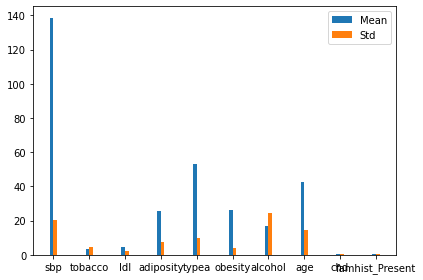

In [6]:
x = np.arange(10)

fig, ax = plot.subplots()
rects1 = ax.bar(x - 0.1/2, dataset.describe().loc['mean'],0.1, label='Mean')
rects2 = ax.bar(x + 0.1/2, dataset.describe().loc['std'], 0.1, label='Std')

ax.set_xticks(x, dataset.columns.values.tolist())
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
fig.tight_layout()

plot.show()
#dataset.describe().loc['mean'].plot(kind='bar', title='Média', colormap='viridis')



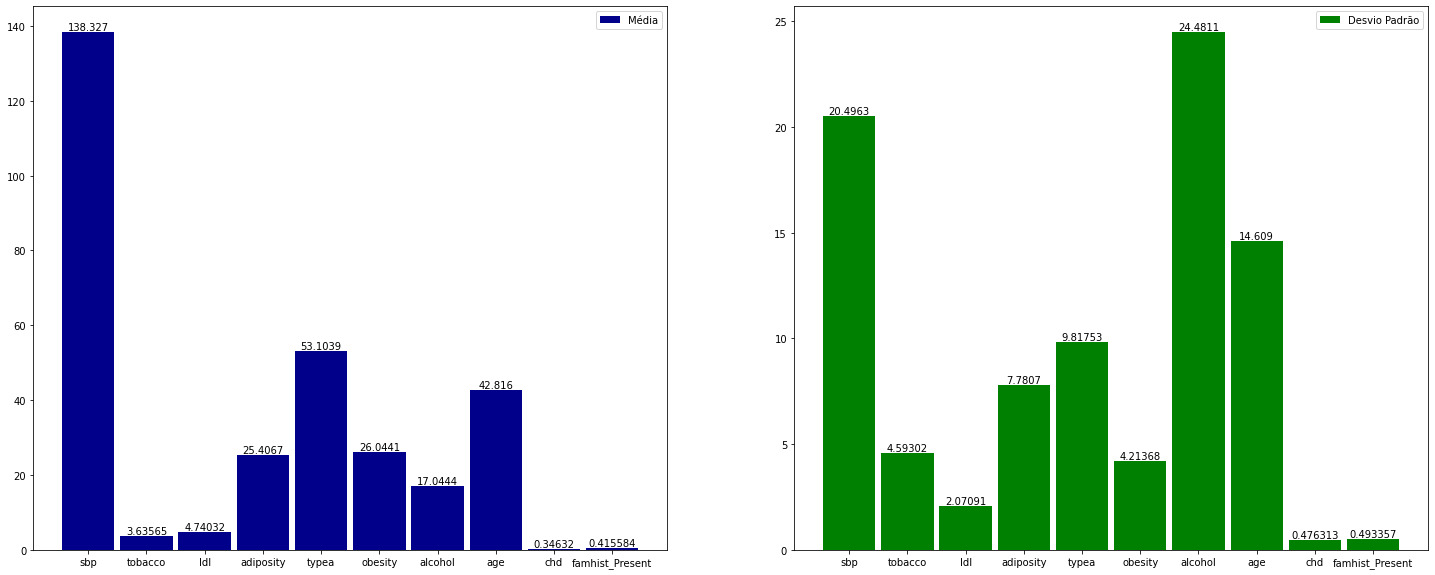

In [7]:
x = np.arange(10)
fig, (ax1,ax2) = plot.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(25)

rect1 = ax1.bar(x,dataset.describe().loc['mean'],0.9, label='Média', color = 'darkblue')
rect2 = ax2.bar(x,dataset.describe().loc['std'],0.9, label='Desvio Padrão', color = 'green')

ax1.set_xticks(x, dataset.columns.values.tolist())
ax2.set_xticks(x, dataset.columns.values.tolist())


ax1.legend()
ax2.legend()

ax1.bar_label(rect1)
ax2.bar_label(rect2)

plot.show()

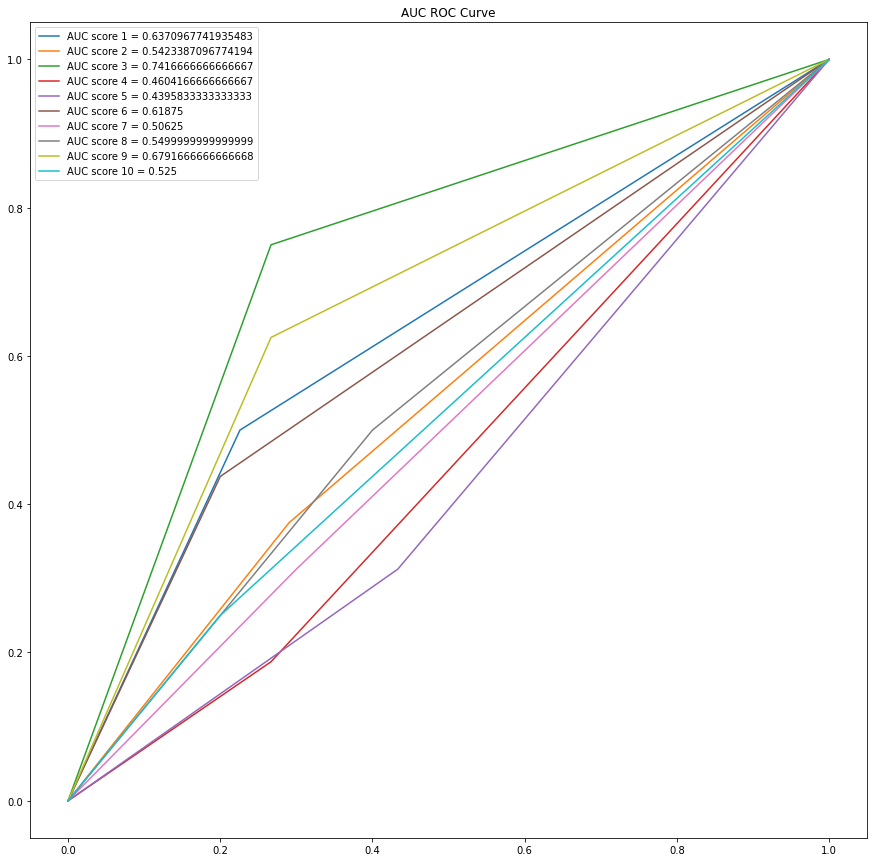

AUC Médio: 0.5700268817204301


In [15]:
plot.figure(figsize=(15,15))

var_columns = [c for c in dataset.columns if c not in ['chd']]  # Nomes das colunas sem'chd'

X = dataset.loc[:, var_columns].values
y = dataset.loc[:, 'chd']



legenda = []
scores = []
confusion = []

folds = StratifiedKFold(n_splits=10)
dectree = DecisionTreeClassifier()

x = 1
for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
    dectree.fit(X_train, y_train)

    probs = dectree.predict_proba(X_test)
    probs = probs[:,1]

    dectree_auc = roc_auc_score(y_test, probs)

    scores.append(dectree_auc)
    legenda.append('AUC score {} = {}' .format(x, dectree_auc))
    x += 1

    fpr, tpr, _ = roc_curve(y_test, probs)

    prediction = dectree.predict(X_test)
    confusion.append(confusion_matrix(y_test, prediction))

    plot.plot(fpr, tpr)
plot.title("AUC ROC Curve")
plot.legend(legenda)
plot.show()
print("AUC Médio: {}" .format(np.mean(scores)))

[[213  89]
 [ 88  72]]


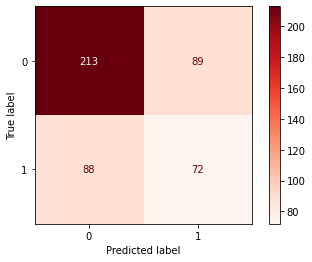

In [14]:
reduced = np.add.reduce(confusion)
print(reduced)

disp = ConfusionMatrixDisplay(reduced, [0,1])
disp.plot(cmap="Reds", values_format='')
plot.show()


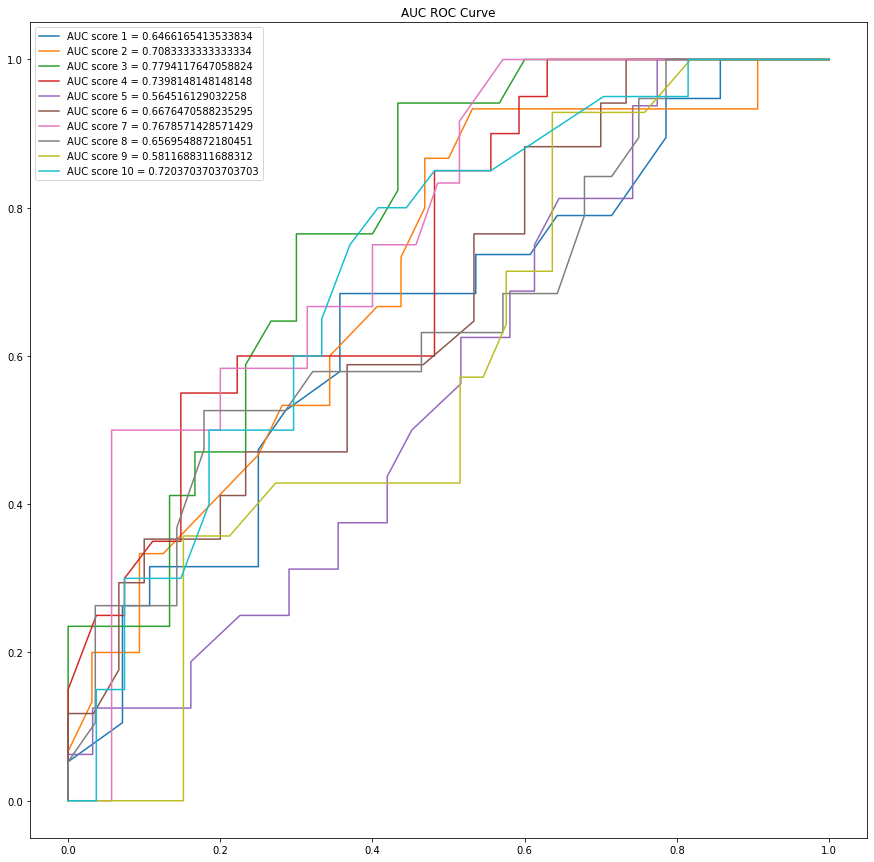

In [ ]:
plot.figure(figsize=(15,15))

rf = RandomForestClassifier(n_estimators=100, max_features=None, random_state=123)

legenda = []
scores = []
confusion = []

x = 1
for a in folds.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
    rf.fit(X_train, y_train)

    probs = rf.predict_proba(X_test)
    probs = probs[:,1]

    rf_auc = roc_auc_score(y_test, probs)
    scores.append(rf_auc)
    legenda.append('AUC score {} = {}' .format(x, rf_auc))
    x += 1

    fpr, tpr, _ = roc_curve(y_test, probs)

    prediction = rf.predict(X_test)
    confusion.append(confusion_matrix(y_test, prediction))

    plot.plot(fpr, tpr)
plot.title("AUC ROC Curve")
plot.legend(legenda)
plot.show()
print("AUC Médio: {}" .format(np.mean(scores)))

[[216  86]
 [ 92  68]]


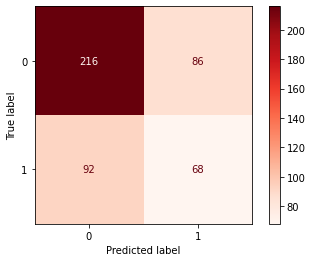

In [16]:
reduced = np.add.reduce(confusion)
print(reduced)

disp = ConfusionMatrixDisplay(reduced, [0,1])
disp.plot(cmap="Reds", values_format='')
plot.show()


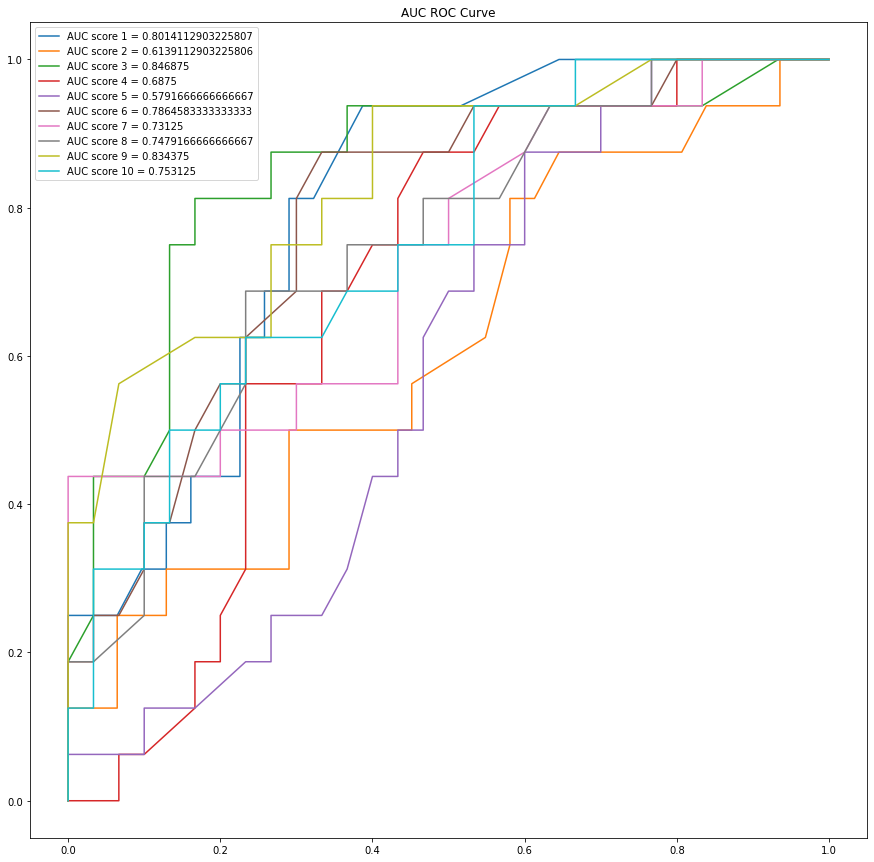

In [17]:
plot.figure(figsize=(15,15))

rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=123)

legenda = []
scores = []
confusion = []

x = 1
for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
    rf.fit(X_train, y_train)

    probs = rf.predict_proba(X_test)
    probs = probs[:,1]

    rf_auc = roc_auc_score(y_test, probs)
    scores.append(rf_auc)
    legenda.append('AUC score {} = {}' .format(x, rf_auc))
    x += 1

    fpr, tpr, _ = roc_curve(y_test, probs)

    prediction = rf.predict(X_test)
    confusion.append(confusion_matrix(y_test, prediction))

    plot.plot(fpr, tpr)
plot.title("AUC ROC Curve")
plot.legend(legenda)
plot.show()
print("AUC Médio: {}" .format(np.mean(scores)))

O auc score médio utilizando Random Forest com todas as features é: 0.7029217506751713
[[247  55]
 [103  65]]


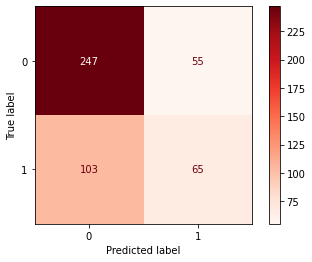

In [ ]:
reduced = np.add.reduce(confusion)
print(reduced)

disp1 = ConfusionMatrixDisplay(reduced, [0,1])
disp1.plot(cmap="Reds", values_format='')
plot.show()
